<a href="https://colab.research.google.com/github/InsightofSPb/Automatic-word-processing-and-processing-of-images/blob/main/Local%20features/Task13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
from PIL import Image
mpl.rcParams['figure.dpi'] = 200

(810, 1280, 3)


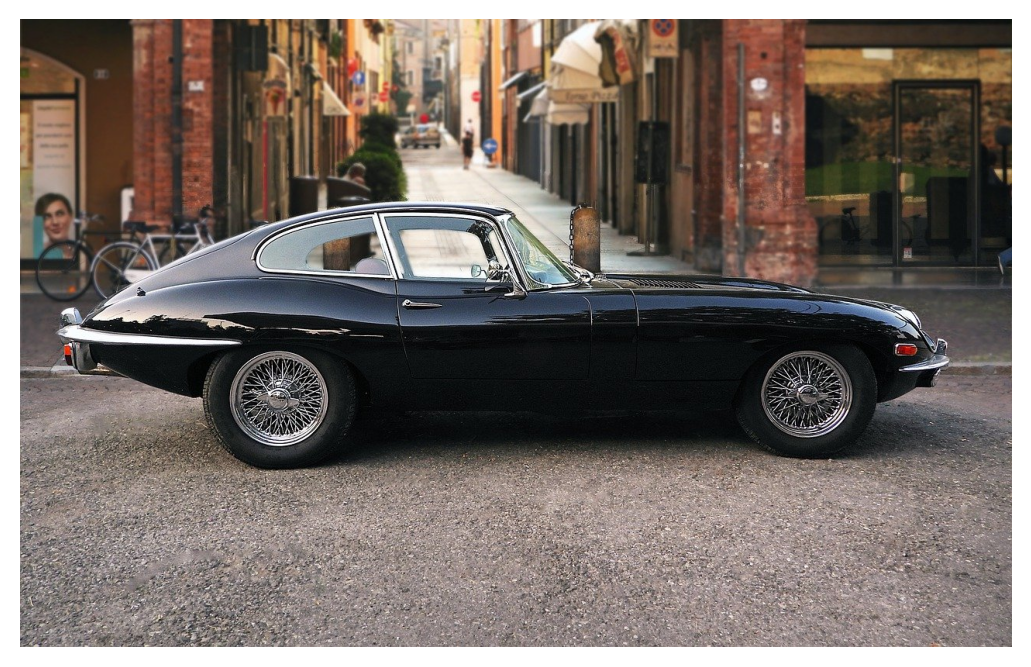

In [ ]:
img = cv2.imread('/content/car-4445171_1280.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
print(img.shape)

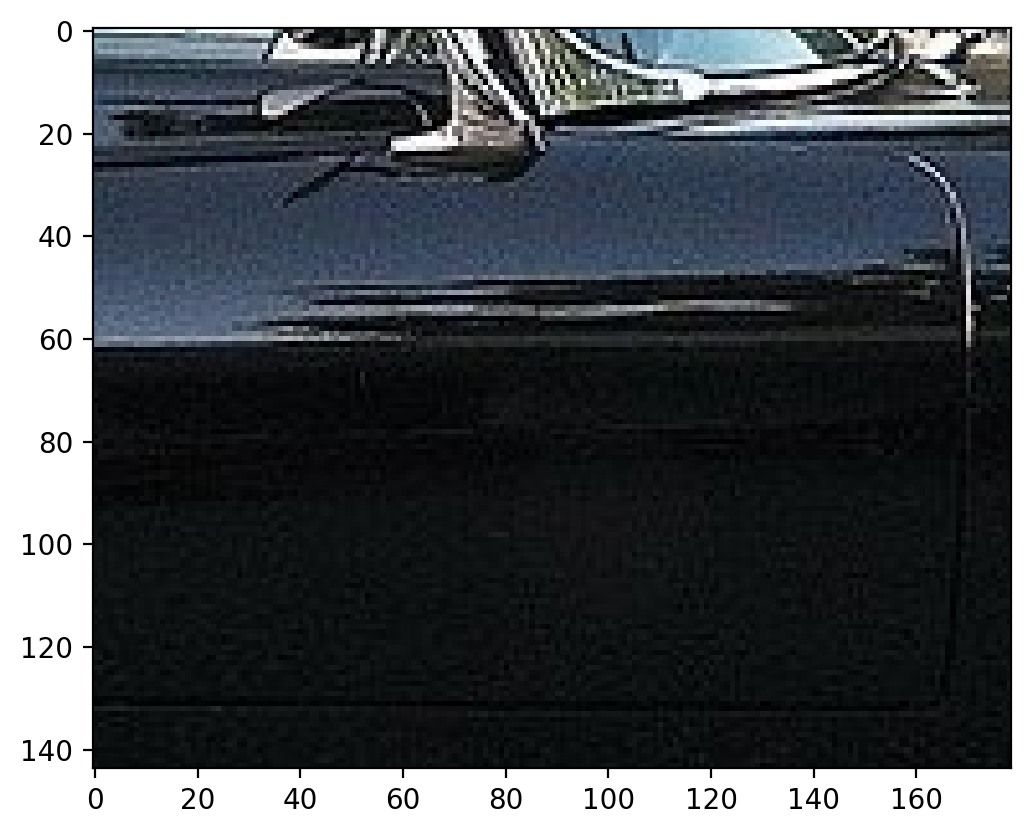

In [ ]:
crop_img = img[333:477, 567:746]
plt.imshow(crop_img)
plt.show()

In [ ]:
print(f'height: {crop_img.shape[0]}\n width: {crop_img.shape[1]}')

height: 144
 width: 179


In [ ]:
img1 = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None) 
kp2, des2 = sift.detectAndCompute(img2, None) 

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True) 
#crossCheck=false - совпадения вида один ко многим, crossCheck=true - совпадения вида один к одному
matches = bf.match(des1,des2)

In [ ]:
matches = sorted(matches, key = lambda x:x.distance) 
print('Количество совпадений ', len(matches))
for i in range(0,5):
  print('Расстояние ',matches[i].distance,'Индекс 1 ',matches[i].trainIdx,'Индекс 2 ', matches[i].queryIdx)

Количество совпадений  31
Расстояние  0.0 Индекс 1  2146 Индекс 2  2
Расстояние  0.0 Индекс 1  2182 Индекс 2  5
Расстояние  0.0 Индекс 1  2183 Индекс 2  6
Расстояние  0.0 Индекс 1  2195 Индекс 2  7
Расстояние  0.0 Индекс 1  2205 Индекс 2  8


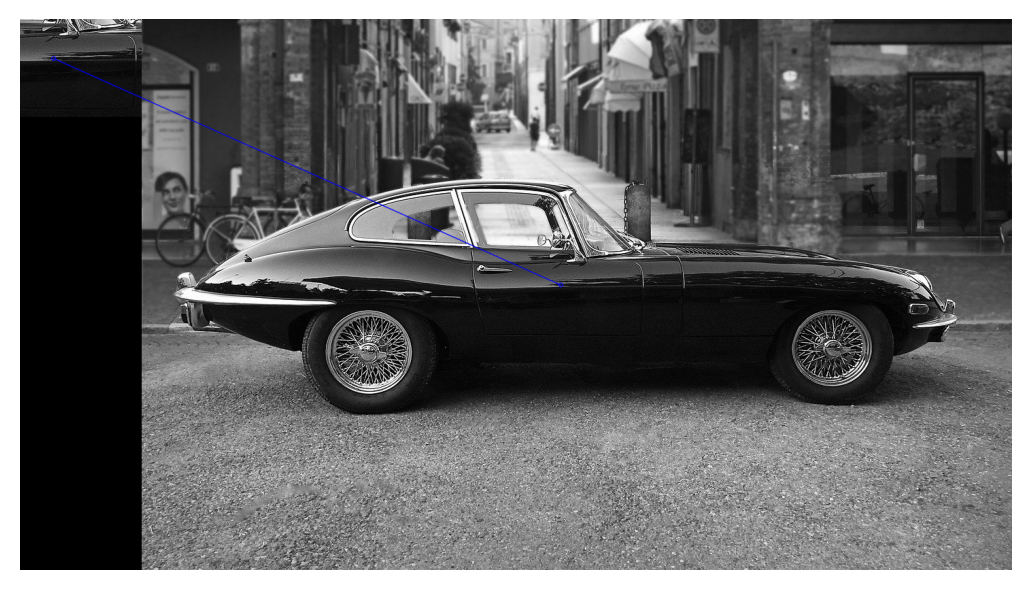

In [ ]:
matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:1], None, [255,0,0], flags=2)
mpl.rcParams['figure.dpi'] = 200
plt.axis('off')
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))

In [ ]:
print(f'X: {round(kp2[2146].pt[0])}\n y: {round(kp2[2146].pt[1])}')

X: 616
 y: 391


In [ ]:
print(len(kp2))

4009


In [ ]:
R, G, B = img[391][616]
print('Red channel:', R)
print('Green channel: ', G)
print('Blue channel:  ', B)

Red channel: 0
Green channel:  1
Blue channel:   5
